# Loading the Dataset

### First, load the dataset and take a quick look at its structure.

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [253]:
'''!pip install openpyxl xlrd'''

'!pip install openpyxl xlrd'

In [254]:
'''# Load the first file with the header
df1 = pd.read_csv('/content/Scraping fitness reviews.xls')

# Load the remaining files without headers
df2 = pd.read_csv('/content/Scraping gadgets reviews.xls', header=None)
df3 = pd.read_csv('/content/Scraping shoes reviews.xls', header=None)
df4 = pd.read_csv('/content/Scraping skincare reviews.xls', header=None)
df5 = pd.read_excel('/content/Scraping negative reviews.xls', header=None)

# Combine DataFrames
df2.columns = df1.columns
df3.columns = df1.columns
df4.columns = df1.columns
df5.columns = df1.columns

combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('/content/Reviews.csv', index=False)

# Display a message to indicate the file has been saved
print("File saved to /content/Reviews.csv")'''

'# Load the first file with the header\ndf1 = pd.read_csv(\'/content/Scraping fitness reviews.xls\')\n\n# Load the remaining files without headers\ndf2 = pd.read_csv(\'/content/Scraping gadgets reviews.xls\', header=None)\ndf3 = pd.read_csv(\'/content/Scraping shoes reviews.xls\', header=None)\ndf4 = pd.read_csv(\'/content/Scraping skincare reviews.xls\', header=None)\ndf5 = pd.read_excel(\'/content/Scraping negative reviews.xls\', header=None)\n\n# Combine DataFrames\ndf2.columns = df1.columns\ndf3.columns = df1.columns\ndf4.columns = df1.columns\ndf5.columns = df1.columns  \n\ncombined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)\n\n# Save the combined DataFrame to a new CSV file\ncombined_df.to_csv(\'/content/Reviews.csv\', index=False)\n\n# Display a message to indicate the file has been saved\nprint("File saved to /content/Reviews.csv")'

# Basic EDA

In [255]:
df = pd.read_csv('/content/Reviews.csv', encoding='ISO-8859-1')

In [256]:
df.head()

,Unnamed: 0,reviews
0,0,"\nVery easy to use, set up and adjust resistan..."
1,1,\nI like the idea that the screws are easy to ...
2,2,"\nI have only had this one day, but do like th..."
3,3,\nI actually enjoy using this for several sets...
4,4,"\nThis works great, I bought one for myself a..."


In [257]:
df.shape

(2318, 2)

In [258]:
# Drop the unnamed index column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [259]:
# Trim leading and trailing whitespace and newline characters from the 'reviews' column
df['reviews'] = df['reviews'].str.strip()

In [260]:
df.head()

,reviews
0,"Very easy to use, set up and adjust resistance..."
1,I like the idea that the screws are easy to ge...
2,"I have only had this one day, but do like the ..."
3,I actually enjoy using this for several sets e...
4,"This works great, I bought one for myself and..."


In [261]:
df.describe()

,reviews
count,2318
unique,1468
top,Comfortable
freq,4


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2318 non-null   object
dtypes: object(1)
memory usage: 18.2+ KB


In [263]:
df.isnull().sum()

,0
reviews,0


In [264]:
df.duplicated().sum()

850

In [265]:
df.drop_duplicates(inplace=True)

In [266]:
df.shape

(1468, 1)

#Text Preprocessing

**Lowercasing:** Convert all text to lowercase to maintain uniformity.

**Removing Punctuation and Special Characters:** Remove any punctuation marks, special characters, and numbers that do not contribute to the sentiment.

**Tokenization:** Split the text into individual words or tokens.

**Stopwords Removal:** Remove common words like "the," "is," "in," etc., that do not carry much meaning in sentiment analysis.

**Stemming/Lemmatization:** Reduce words to their root form. Stemming cuts off prefixes or suffixes, while lemmatization returns the base form of words.

In [267]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [268]:
# Remove leading and trailing spaces from column names
#df.columns = df.columns.str.strip()

In [269]:
# Define column name for reviews
review_column = 'reviews'

# Define a function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation, special characters, and numbers
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and special characters

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization (alternative to stemming)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joining the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the preprocessing to the correct review column
df['cleaned_review'] = df[review_column].apply(preprocess_text)

In [270]:
df.head()

,reviews,cleaned_review
0,"Very easy to use, set up and adjust resistance...",easy use set adjust resistance solid portable ...
1,I like the idea that the screws are easy to ge...,like idea screw easy get tighten arm get loose...
2,"I have only had this one day, but do like the ...",one day like feel piece equipment feel make up...
3,I actually enjoy using this for several sets e...,actually enjoy using several set every day wor...
4,"This works great, I bought one for myself and...",work great bought one one sister sister use ti...


# Advanced EDA & Feature Engineering

### Length of Reviews: Analyze the distribution of the length of reviews (in terms of word count).

In [271]:
# Calculate review lengths
df['review_length'] = df['reviews'].apply(len)
df['cleaned_review_length'] = df['cleaned_review'].apply(len)

In [272]:
df.head()

,reviews,cleaned_review,review_length,cleaned_review_length
0,"Very easy to use, set up and adjust resistance...",easy use set adjust resistance solid portable ...,601,379
1,I like the idea that the screws are easy to ge...,like idea screw easy get tighten arm get loose...,1597,953
2,"I have only had this one day, but do like the ...",one day like feel piece equipment feel make up...,240,122
3,I actually enjoy using this for several sets e...,actually enjoy using several set every day wor...,955,546
4,"This works great, I bought one for myself and...",work great bought one one sister sister use ti...,307,154


In [273]:
df.describe(include=['number'])

,review_length,cleaned_review_length
count,1468.000000,1468.000000
mean,296.368529,183.396458
std,543.603911,337.897857
min,4.000000,0.000000
25%,59.000000,38.000000
50%,108.500000,67.000000
75%,321.250000,195.250000
max,9568.000000,5848.000000


In [1]:
import plotly.express as px

# Create the histogram
fig = px.histogram(df, x='review_length', nbins=30, title='Distribution of Reviews Lengths')

# Update layout for black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',  # Change font color to white for better visibility
    title_font_color='white'
)
fig.show()

NameError: name 'df' is not defined

In [275]:
# Create the histogram
fig = px.histogram(df, x='cleaned_review_length', nbins=30, title='Distribution of Cleaned Review Lengths')

# Update layout for black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',  # Change font color to white for better visibility
    title_font_color='white'
)
fig.show()

### Word Cloud: Create a word cloud to visualize the most frequent words in the reviews.

In [276]:
# Combine all cleaned reviews into a single string for the word cloud
combined_reviews = ' '.join(df['cleaned_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_reviews)

# Convert word cloud to an image
wordcloud_image = wordcloud.to_image()

# Convert the image to an array
wordcloud_array = np.array(wordcloud_image)

# Create a Plotly figure to display the word cloud
fig = px.imshow(wordcloud_array, title='Word Cloud of Reviews')

# Update layout for black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    font_color='white',
    xaxis_visible=False,
    yaxis_visible=False
)

# Show the plot
fig.show()

### Frequency Distribution: Plot the frequency distribution of words to see which words appear most frequently.

In [277]:
# Combine all cleaned reviews into a single string for frequency distribution
combined_reviews = ' '.join(df['cleaned_review'])

# Frequency Distribution
def plot_frequency_distribution(text):
    words = text.split()
    freq_dist = pd.Series(words).value_counts().head(20)  # Top 20 words

    # Create a Plotly bar chart
    fig = px.bar(
        freq_dist,
        x=freq_dist.index,
        y=freq_dist.values,
        title='Top 20 Most Frequent Words',
        labels={'x': 'Words', 'y': 'Frequency'},
        text=freq_dist.values
    )

    # Update layout for black background
    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='white',
        title_font_color='white',
        xaxis_title='Words',
        yaxis_title='Frequency'
    )

    # Show the plot
    fig.show()

# Call the function to plot
plot_frequency_distribution(combined_reviews)

### N-gram Analysis: Analyze bigrams and trigrams (combinations of two and three words) to understand common phrases.

In [278]:
from nltk import ngrams
import re

# N-gram Analysis (Bigrams and Trigrams)
def plot_ngrams(text, n=2):
    words = text.split()
    n_grams = ngrams(words, n)
    n_gram_freq = pd.Series(n_grams).value_counts().head(20)

    # Convert tuples to strings for plotting
    n_gram_freq.index = [' '.join(gram) for gram in n_gram_freq.index]

    # Create a Plotly bar chart
    fig = px.bar(
        x=n_gram_freq.index,
        y=n_gram_freq.values,
        title=f'Top 20 Most Frequent {"Bigrams" if n == 2 else "Trigrams"}',
        labels={'x': 'N-grams', 'y': 'Frequency'},
        text=n_gram_freq.values
    )

    # Update layout for black background
    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='white',
        title_font_color='white',
        xaxis_title='N-grams',
        yaxis_title='Frequency'
    )

    # Show the plot
    fig.show()

In [279]:
# Plot Bigrams
plot_ngrams(combined_reviews, n=2)

In [280]:
# Plot Trigrams
plot_ngrams(combined_reviews, n=3)

In [281]:
from textblob import TextBlob

# Word count
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Sentiment polarity
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

print(df[['cleaned_review_length', 'word_count', 'polarity']].head())

   cleaned_review_length  word_count  polarity
0                    379          52  0.077083
1                    953         157  0.187166
2                    122          21  0.250000
3                    546          87  0.140192
4                    154          23  0.800000


In [282]:
# Pairplot using Plotly
fig = px.scatter_matrix(
    df[['cleaned_review_length', 'word_count', 'polarity']],
    dimensions=['cleaned_review_length', 'word_count', 'polarity'],
    color=df['polarity'],  # Optional: Color by polarity or any other feature
    title='Pairplot of Review Features',
)

# Update layout for black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font_color='white'
)

# Show the plot
fig.show()

# Feature Engineering

### VADER sentiment analyzer

In [283]:
pip install nltk scikit-learn gensim

In [284]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag, word_tokenize
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [285]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment_scores(review):
    return sid.polarity_scores(review)

# Apply sentiment scores to the cleaned reviews
df['sentiment_scores'] = df['cleaned_review'].apply(get_sentiment_scores)

# Expand the dictionary into separate columns while keeping the sentiment_scores column
sentiment_df = df['sentiment_scores'].apply(pd.Series)

# Concatenate the new sentiment columns with the original DataFrame
df = pd.concat([df, sentiment_df], axis=1)

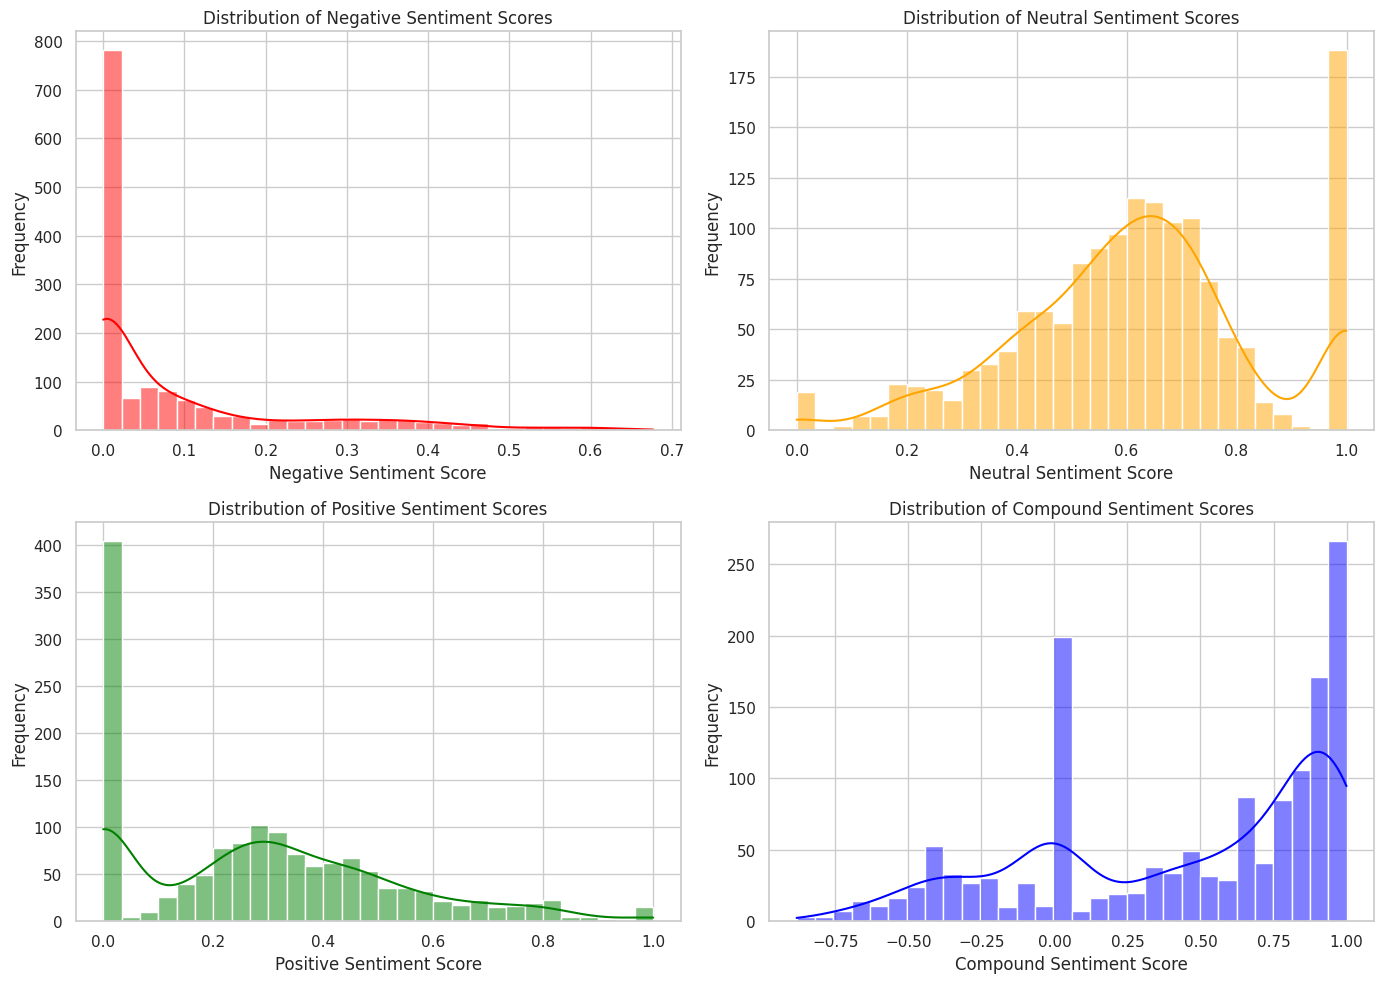

In [286]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a grid of subplots
plt.figure(figsize=(14, 10))

# Plot histogram of 'neg' sentiment scores
plt.subplot(2, 2, 1)
sns.histplot(df['neg'], bins=30, kde=True, color='red')
plt.title('Distribution of Negative Sentiment Scores')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Frequency')

# Plot histogram of 'neu' sentiment scores
plt.subplot(2, 2, 2)
sns.histplot(df['neu'], bins=30, kde=True, color='orange')
plt.title('Distribution of Neutral Sentiment Scores')
plt.xlabel('Neutral Sentiment Score')
plt.ylabel('Frequency')

# Plot histogram of 'pos' sentiment scores
plt.subplot(2, 2, 3)
sns.histplot(df['pos'], bins=30, kde=True, color='green')
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Frequency')

# Plot histogram of 'compound' sentiment scores
plt.subplot(2, 2, 4)
sns.histplot(df['compound'], bins=30, kde=True, color='blue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

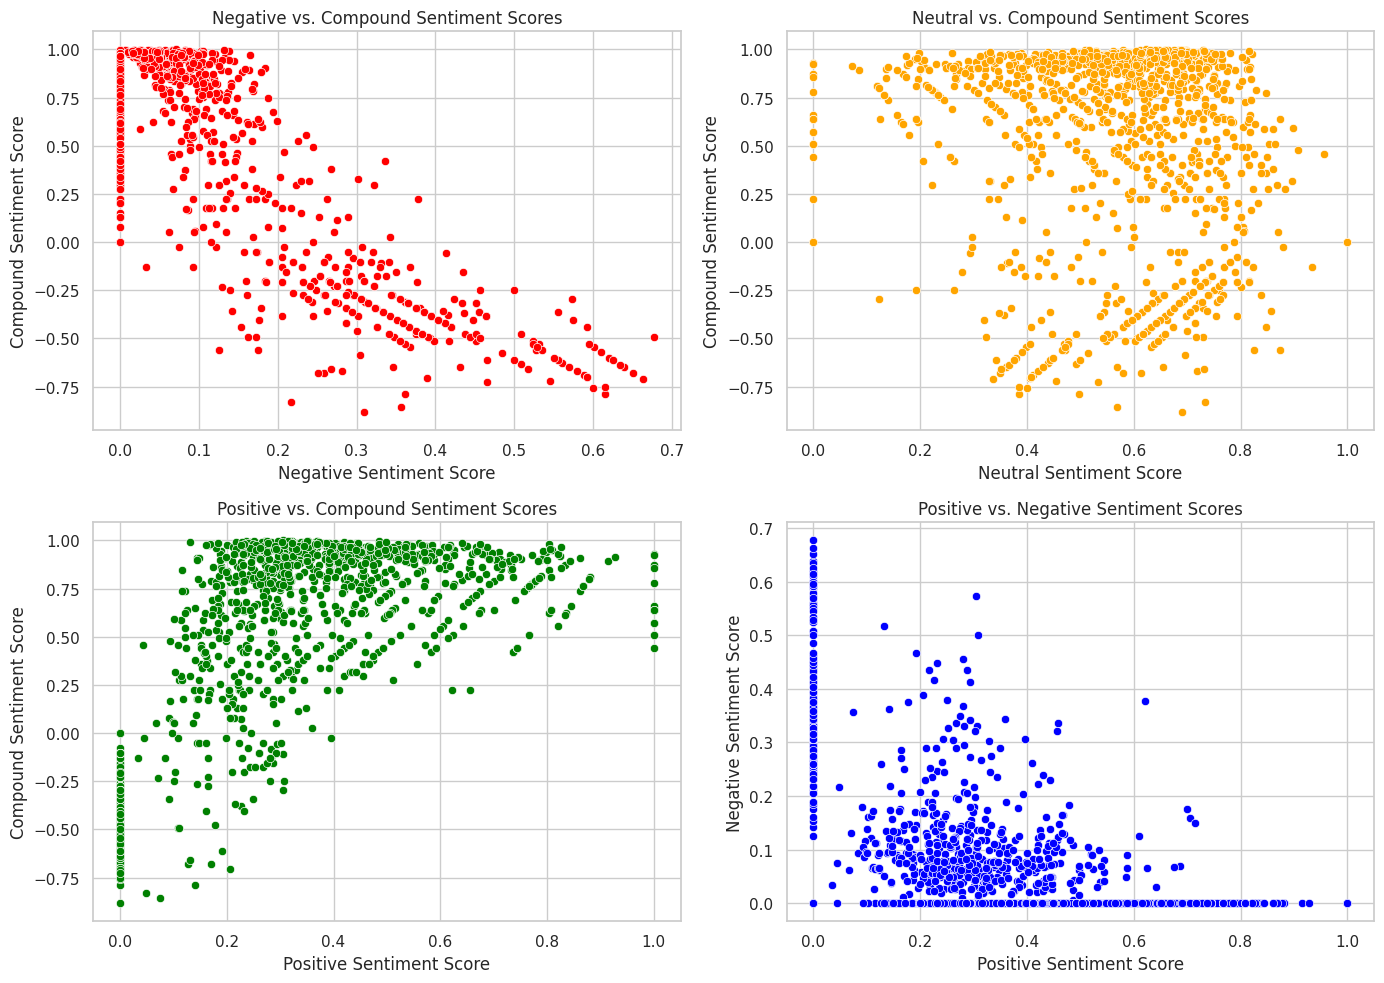

In [287]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with a grid of scatter plots
plt.figure(figsize=(14, 10))

# Scatter plot: Negative vs. Compound Sentiment Scores
plt.subplot(2, 2, 1)
sns.scatterplot(x='neg', y='compound', data=df, color='red')
plt.title('Negative vs. Compound Sentiment Scores')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Compound Sentiment Score')

# Scatter plot: Neutral vs. Compound Sentiment Scores
plt.subplot(2, 2, 2)
sns.scatterplot(x='neu', y='compound', data=df, color='orange')
plt.title('Neutral vs. Compound Sentiment Scores')
plt.xlabel('Neutral Sentiment Score')
plt.ylabel('Compound Sentiment Score')

# Scatter plot: Positive vs. Compound Sentiment Scores
plt.subplot(2, 2, 3)
sns.scatterplot(x='pos', y='compound', data=df, color='green')
plt.title('Positive vs. Compound Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Compound Sentiment Score')

# Scatter plot: Positive vs. Negative Sentiment Scores
plt.subplot(2, 2, 4)
sns.scatterplot(x='pos', y='neg', data=df, color='blue')
plt.title('Positive vs. Negative Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Negative Sentiment Score')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### TF-IDF (Term Frequency-Inverse Document Frequency): Convert the text data into numerical features. TF-IDF is a popular method that reflects the importance of a word in a document relative to a corpus.

In [288]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)

In [289]:
# Text Length
#df['text_length'] = df['cleaned_review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)  # Word count
df['char_length'] = df['cleaned_review'].apply(lambda x: len(x) if isinstance(x, str) else 0)  # Character count

# Display the first few rows to confirm the changes
df[['cleaned_review', 'word_count', 'char_length']].head()

,cleaned_review,word_count,char_length
0,easy use set adjust resistance solid portable ...,52.0,379
1,like idea screw easy get tighten arm get loose...,157.0,953
2,one day like feel piece equipment feel make up...,21.0,122
3,actually enjoy using several set every day wor...,87.0,546
4,work great bought one one sister sister use ti...,23.0,154


In [290]:
df.head()

,reviews,cleaned_review,review_length,cleaned_review_length,word_count,polarity,sentiment_scores,neg,neu,pos,...,zapatos,zero,zit,zmiany,zombie,zona,zone,zoo,zoom,char_length
0,"Very easy to use, set up and adjust resistance...",easy use set adjust resistance solid portable ...,601.0,379.0,52.0,0.077083,"{'neg': 0.065, 'neu': 0.624, 'pos': 0.311, 'co...",0.065,0.624,0.311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379
1,I like the idea that the screws are easy to ge...,like idea screw easy get tighten arm get loose...,1597.0,953.0,157.0,0.187166,"{'neg': 0.058, 'neu': 0.741, 'pos': 0.201, 'co...",0.058,0.741,0.201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,953
2,"I have only had this one day, but do like the ...",one day like feel piece equipment feel make up...,240.0,122.0,21.0,0.250000,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.000,0.609,0.391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122
3,I actually enjoy using this for several sets e...,actually enjoy using several set every day wor...,955.0,546.0,87.0,0.140192,"{'neg': 0.026, 'neu': 0.73, 'pos': 0.244, 'com...",0.026,0.730,0.244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,546
4,"This works great, I bought one for myself and...",work great bought one one sister sister use ti...,307.0,154.0,23.0,0.800000,"{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.000,0.719,0.281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154


# Sentiment Analysis

You can use TextBlob or VADER for sentiment analysis. TextBlob is easy to use and suitable for basic sentiment analysis.

### Using TextBlob

TextBlob provides polarity and subjectivity scores for each text. Polarity ranges from -1 (negative) to 1 (positive), while subjectivity ranges from 0 (objective) to 1 (subjective).

In [291]:
from textblob import TextBlob

# Function to get sentiment polarity and subjectivity
def get_sentiment(text):
    # Check if text is a string and not null
    if isinstance(text, str) and text:
        blob = TextBlob(text)
        return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])
    else:
        # Return 0 for polarity and subjectivity for non-string or null values
        return pd.Series([0, 0])

# Apply sentiment function
df[['polarity', 'subjectivity']] = df['cleaned_review'].apply(get_sentiment)

# Display sentiment analysis results
print(df[['cleaned_review', 'polarity', 'subjectivity']].head())

                                      cleaned_review  polarity  subjectivity
0  easy use set adjust resistance solid portable ...  0.077083      0.620833
1  like idea screw easy get tighten arm get loose...  0.187166      0.466800
2  one day like feel piece equipment feel make up...  0.250000      0.500000
3  actually enjoy using several set every day wor...  0.140192      0.374231
4  work great bought one one sister sister use ti...  0.800000      0.750000


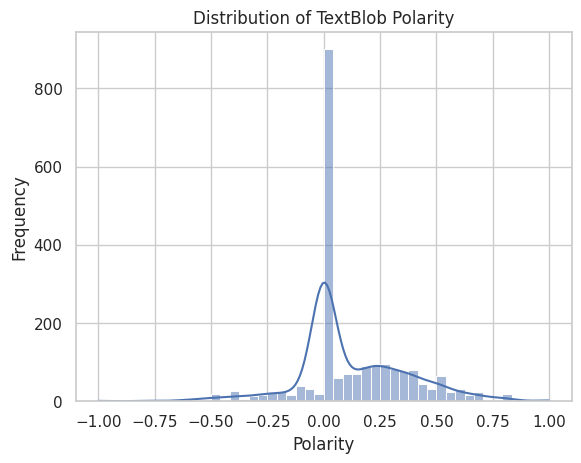

In [292]:
# Histogram of TextBlob Polarity
sns.histplot(df['polarity'], kde=True)
plt.title('Distribution of TextBlob Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

### Using VADER

VADER is particularly useful for sentiment analysis on social media and short text. It provides a compound score that summarizes the overall sentiment.

In [293]:
!pip install vaderSentiment

In [294]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment
def get_vader_sentiment(text):
    # Check if text is a string
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        # Return 0 for non-string values
        return 0

# Apply sentiment function
df['vader_sentiment'] = df['reviews'].apply(get_vader_sentiment)

# Display sentiment analysis results
print(df[['reviews', 'vader_sentiment']].head())

                                             reviews  vader_sentiment
0  Very easy to use, set up and adjust resistance...           0.9764
1  I like the idea that the screws are easy to ge...           0.9777
2  I have only had this one day, but do like the ...           0.9161
3  I actually enjoy using this for several sets e...           0.9563
4  This works great,  I bought one for myself and...           0.8796


### Analyze Sentiment Results & Visualize Sentiment Distributions

Histograms and Density Plots: To understand the distribution of sentiment scores.

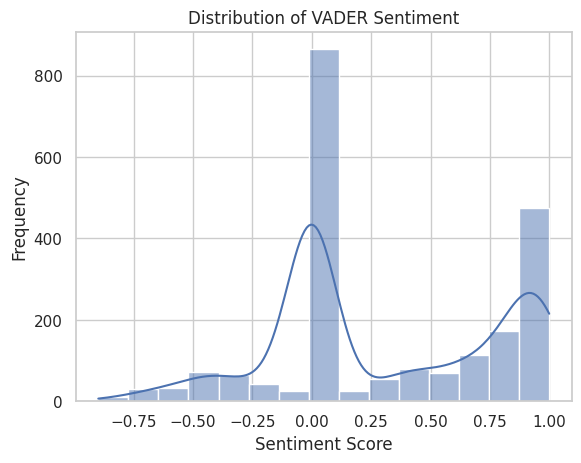

In [295]:
# Histogram of VADER Sentiment
sns.histplot(df['vader_sentiment'], kde=True)
plt.title('Distribution of VADER Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [296]:
# Create the scatter plot
fig = go.Figure()

# Add a scatter trace
fig.add_trace(go.Scatter(
    x=df['polarity'],
    y=df['vader_sentiment'],
    mode='markers',
    marker=dict(size=8, color='lightblue'),
    name='Polarity vs VADER Sentiment'
))

# Update layout with titles and axis labels
fig.update_layout(
    title='Comparison of TextBlob Polarity and VADER Sentiment',
    xaxis_title='TextBlob Polarity',
    yaxis_title='VADER Sentiment',
    plot_bgcolor='black',      # Set the plot background color to black
    paper_bgcolor='black',     # Set the paper background color to black
    font_color='white',        # Set the font color to white
    title_font=dict(size=24),  # Set the font size for the title
)

# Show the plot
fig.show()

# Sentiment Classification

*If you want to classify sentiments into categories (e.g., positive,negative):*

**Binary Classification: If you want to classify sentiments as positive or negative, you can use the sentiment_score to label the data. For instance:**

Positive: sentiment_score > 0

Negative: sentiment_score < 0

**Multiclass Classification: For more granularity, you can create three classes:**

Positive: sentiment_score > 0.5

Negative: sentiment_score < -0.5

Neutral: -0.5 <= sentiment_score <= 0.5


In [297]:
# Function to categorize sentiment into three classes
def categorize_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the sentiment_score column to create the label column
df['label'] = df['compound'].apply(categorize_sentiment)

# Check the distribution of labels
print(df['label'].value_counts())

label
Neutral     1258
Positive     817
Negative      54
Name: count, dtype: int64


In [298]:
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    # Add an else statement to handle polarity values between -0.1 and 0.1
    else:
        return 'neutral'

df['sentiment_class'] = df['polarity'].apply(classify_sentiment)

# Display classified sentiments
print(df[['reviews', 'polarity', 'sentiment_class']].head())

                                             reviews  polarity sentiment_class
0  Very easy to use, set up and adjust resistance...  0.077083         neutral
1  I like the idea that the screws are easy to ge...  0.187166        positive
2  I have only had this one day, but do like the ...  0.250000        positive
3  I actually enjoy using this for several sets e...  0.140192        positive
4  This works great,  I bought one for myself and...  0.800000        positive


### Sentiment Class Distribution

This plot will help you see how many reviews fall into each sentiment category (positive, negative, neutral).

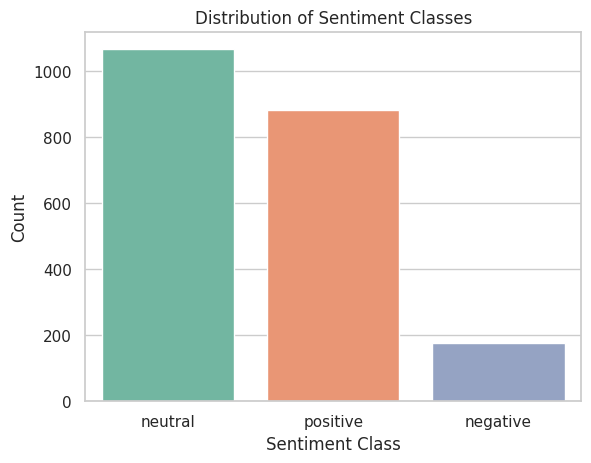

In [299]:
# Countplot of sentiment classes
sns.countplot(x='sentiment_class', data=df, palette='Set2')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

### Sentiment Class vs Review Length

You can visualize how the sentiment class correlates with the length of the reviews.

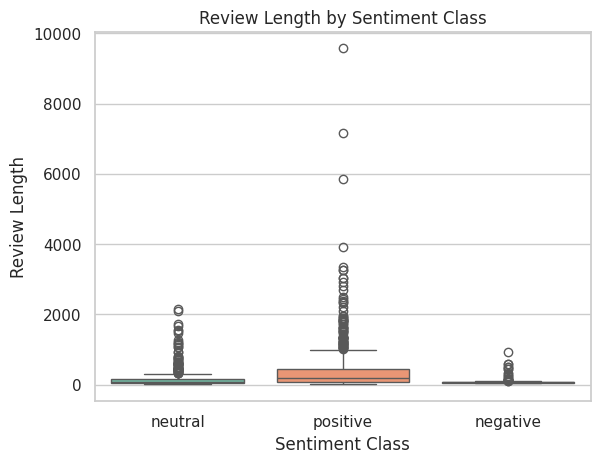

In [300]:
# Boxplot of review length by sentiment class
sns.boxplot(x='sentiment_class', y='review_length', data=df, palette='Set2')
plt.title('Review Length by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Review Length')
plt.show()

### Sentiment Class vs Polarity

A violin plot can show the distribution of polarity scores within each sentiment class, providing insights into how closely the polarity aligns with the classification.

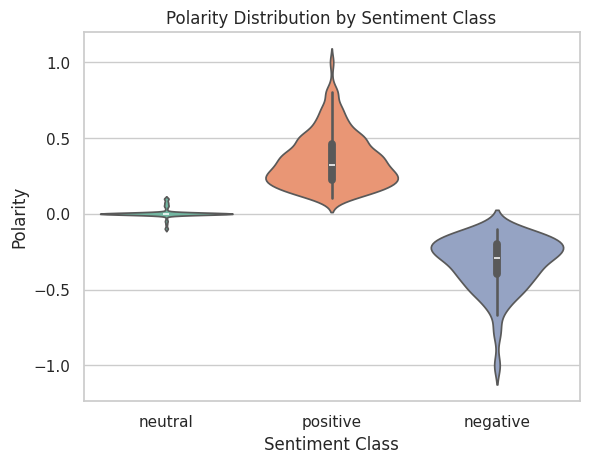

In [301]:
# Violin plot of polarity by sentiment class
sns.violinplot(x='sentiment_class', y='polarity', data=df, palette='Set2')
plt.title('Polarity Distribution by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Polarity')
plt.show()

### Word Cloud by Sentiment Class

You can create separate word clouds for each sentiment class to visualize the most common words used in positive, negative, and neutral reviews.

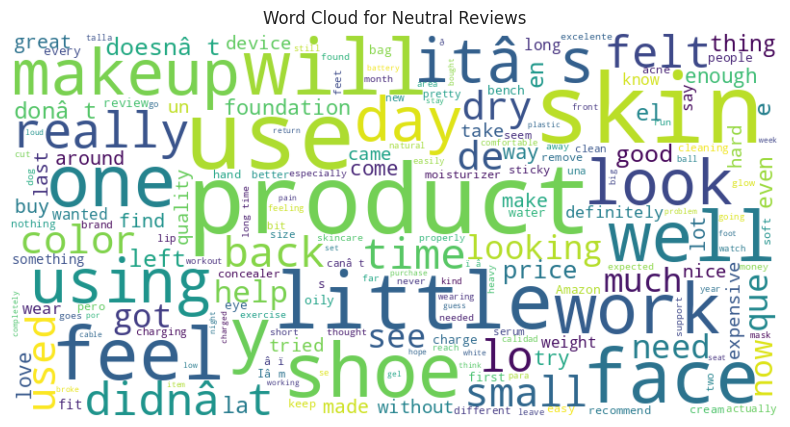

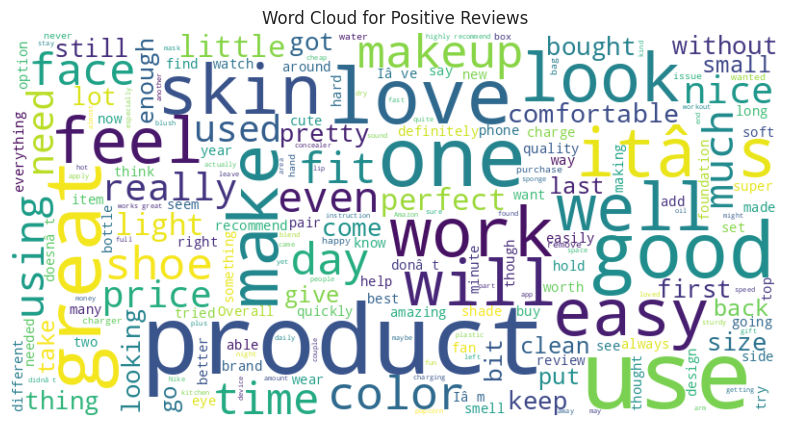

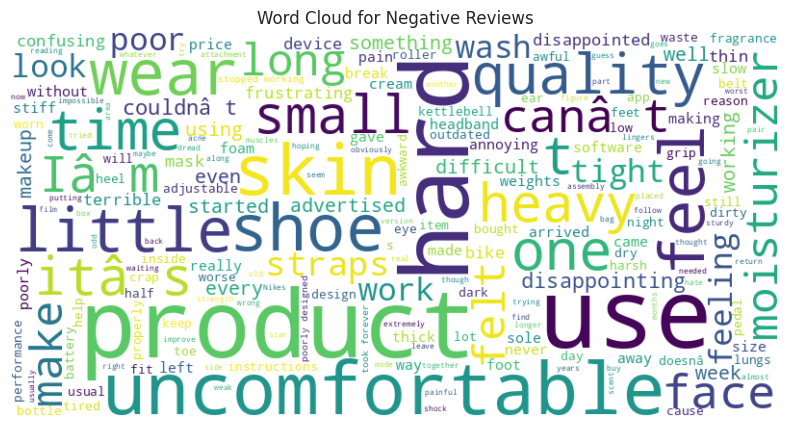

In [302]:
# Generate word clouds for each sentiment class
sentiment_classes = df['sentiment_class'].unique()

for sentiment in sentiment_classes:
    text = ' '.join(df[df['sentiment_class'] == sentiment]['reviews'].dropna())
    wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Reviews')
    plt.show()

### Correlation Analysis:

Check the correlation between different sentiment scores (e.g., TextBlob polarity and VADER sentiment).

In [303]:
correlation = df[['polarity', 'vader_sentiment']].corr()
print(correlation)

                 polarity  vader_sentiment
polarity         1.000000         0.659633
vader_sentiment  0.659633         1.000000


# Model-Based Sentiment Analysis (Classification Model)

**Objective: Build a machine learning model to classify the sentiment of the reviews (positive, negative, neutral).**

### Train-Test Split:

Split your dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [305]:
# Filter for only positive and negative sentiments
df_filtered = df[df['sentiment_class'].isin(['positive', 'negative'])]

# Splitting the data
X = df_filtered['cleaned_review']  # Features
y = df_filtered['sentiment_class']  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
# Convert text data into numerical features
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Apply SMOTE

In [307]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

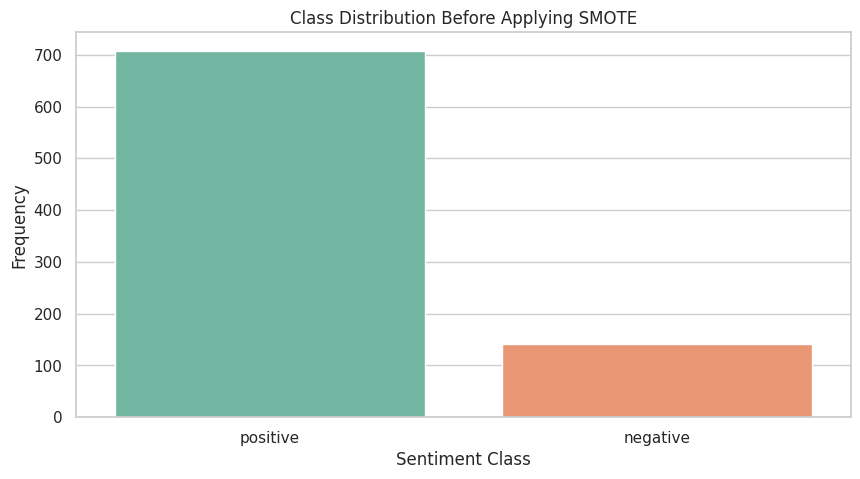

In [308]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution Before Applying SMOTE')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')
plt.show()

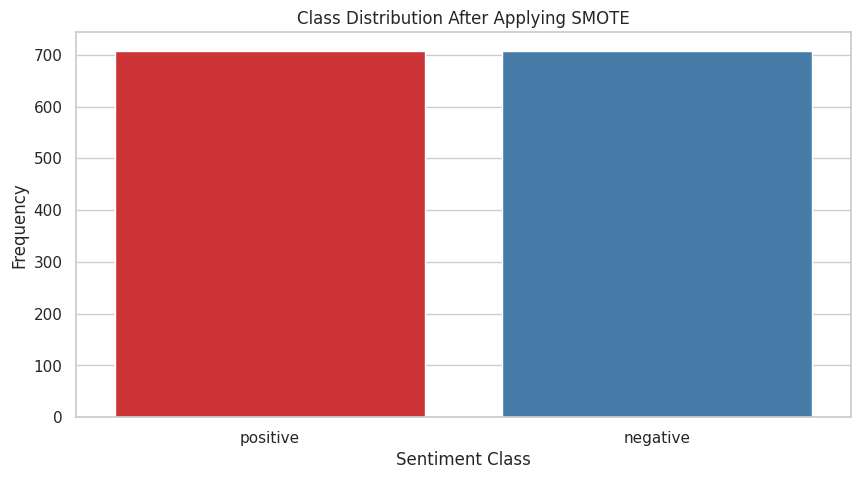

In [309]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_resampled, palette='Set1')
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')
plt.show()

# Model Training and Evaluation

### Logistic Regression

In [310]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
              precision    recall  f1-score   support

    negative       0.91      0.84      0.87        37
    positive       0.97      0.98      0.97       176

    accuracy                           0.96       213
   macro avg       0.94      0.91      0.92       213
weighted avg       0.96      0.96      0.96       213



### Naive Bayes

In [311]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes:
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84        37
    positive       0.97      0.97      0.97       176

    accuracy                           0.94       213
   macro avg       0.90      0.90      0.90       213
weighted avg       0.94      0.94      0.94       213



### Decision Tree

In [312]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

    negative       0.65      0.92      0.76        37
    positive       0.98      0.90      0.94       176

    accuracy                           0.90       213
   macro avg       0.82      0.91      0.85       213
weighted avg       0.92      0.90      0.91       213



### Random Forest

In [313]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

    negative       0.89      0.84      0.86        37
    positive       0.97      0.98      0.97       176

    accuracy                           0.95       213
   macro avg       0.93      0.91      0.92       213
weighted avg       0.95      0.95      0.95       213



### Gradient Boosting

In [314]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test_tfidf)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting:
              precision    recall  f1-score   support

    negative       0.58      0.95      0.72        37
    positive       0.99      0.86      0.92       176

    accuracy                           0.87       213
   macro avg       0.79      0.90      0.82       213
weighted avg       0.92      0.87      0.88       213



### LSTM Model

In [315]:
!pip install --upgrade keras
!pip install -U tensorflow
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [316]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

In [318]:
# Prepare data for LSTM and GRU
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max(len(x) for x in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

### LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
lstm_model.fit(X_train_padded, y_train.map({'positive': 1, 'negative': 0}),
               epochs=10, batch_size=64,
               validation_split=0.2, verbose=1)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test.map({'positive': 1, 'negative': 0}))
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6221 - loss: 0.5958 - val_accuracy: 0.8588 - val_loss: 0.4106
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.8264 - loss: 0.4628 - val_accuracy: 0.8588 - val_loss: 0.4084
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8244 - loss: 0.4672 - val_accuracy: 0.8588 - val_loss: 0.4111
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8428 - loss: 0.4380 - val_accuracy: 0.8588 - val_loss: 0.4160
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8202 - loss: 0.4718 - val_accuracy: 0.8588 - val_loss: 0.4080
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8257 - loss: 0.4649 - val_accuracy: 0.8588 - val_loss: 0.4146
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8189 - loss: 0.4738 - val_accuracy: 0.8588 - val_loss: 0.4081
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8234 - loss: 0.4675 - val_accuracy: 0.8588 - val_loss:

### GRU Model (Gated Recurrent Unit)

GRU is a simple and efficient RNN architecture designed for sequential data, using gating mechanisms to manage information flow.

In [319]:
# Define the GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the GRU model
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train GRU model
gru_model.fit(X_train_padded, y_train.map({'positive': 1, 'negative': 0}),
              epochs=10, batch_size=64,
              validation_split=0.2, verbose=1)

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_padded, y_test.map({'positive': 1, 'negative': 0}))
print(f"GRU Accuracy: {gru_accuracy:.2f}")

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8254 - loss: 0.5794 - val_accuracy: 0.8588 - val_loss: 0.4094
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8295 - loss: 0.4632 - val_accuracy: 0.8588 - val_loss: 0.4217
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8032 - loss: 0.4959 - val_accuracy: 0.8588 - val_loss: 0.4072
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8348 - loss: 0.4530 - val_accuracy: 0.8588 - val_loss: 0.4134
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8225 - loss: 0.4711 - val_accuracy: 0.8588 - val_loss: 0.4135
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8135 - loss: 0.4830 - val_accuracy: 0.8588 - val_loss: 0.4087
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8342 - loss: 0.4505 - val_accuracy: 0.8588 - val_loss: 0.4112
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8332 - loss: 0.4516 - val_accuracy: 0.8588 - val_loss:

# Model Summary

**Best Overall Model:** Logistic Regression based on its highest accuracy (96%) and balanced performance across precision, recall, and F1-scores.

**Good Alternative:** Random Forest with 95% accuracy, good precision, and recall.

**Improvements Needed:** Gradient Boosting shows potential weaknesses, particularly in precision for negative samples, while Decision Tree also needs refinement in its ability to classify negatives correctly.

**Sequential Models (LSTM & GRU):** Both perform decently, but their accuracy and training consistency could be further optimized through hyperparameter tuning or architectural changes.

# Save The Best Model of LSTM & GRU for Deployment

In [320]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

# Prepare data for LSTM and GRU
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max(len(x) for x in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

### LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
lstm_model.fit(X_train_padded, y_train.map({'positive': 1, 'negative': 0}),
               epochs=10, batch_size=64,
               validation_split=0.2, verbose=1)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test.map({'positive': 1, 'negative': 0}))
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

### GRU Model
# Define the GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the GRU model
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train GRU model
gru_model.fit(X_train_padded, y_train.map({'positive': 1, 'negative': 0}),
              epochs=10, batch_size=64,
              validation_split=0.2, verbose=1)

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_padded, y_test.map({'positive': 1, 'negative': 0}))
print(f"GRU Accuracy: {gru_accuracy:.2f}")

# Save the LSTM model
lstm_model.save('lstm_model.h5')

# Save the GRU model
gru_model.save('gru_model.h5')

# Save the tokenizer
joblib.dump(tokenizer, 'tokenizer.pkl')

print("Models and tokenizer saved successfully!")

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6652 - loss: 0.5792 - val_accuracy: 0.8588 - val_loss: 0.4168
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8383 - loss: 0.4521 - val_accuracy: 0.8588 - val_loss: 0.4107
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8440 - loss: 0.4364 - val_accuracy: 0.8588 - val_loss: 0.4129
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8117 - loss: 0.4892 - val_accuracy: 0.8588 - val_loss: 0.4114
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8345 - loss: 0.4509 - val_accuracy: 0.8588 - val_loss: 0.4104
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8394 - loss: 0.4424 - val_accuracy: 0.8588 - val_loss: 0.4096
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8234 - loss: 0.4675 - val_accuracy: 0.8588 - val_loss: 0.4158
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8168 - loss: 0.4761 - val_accuracy: 0.8588 - val_loss:

GRU Accuracy: 0.83
Models and tokenizer saved successfully!
